# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
#load data
data = pd.read_csv('faa_data_subset.xlsx - FAA Wildlife Strikes.csv')

#check data
data.sample(10)

,Airport: Code,Airport: Name,Origin State,Origin State Code,Country,Aircraft: Type,Aircraft: Number of engines,Collision Date and Time,When: Time of day,When: Phase of flight,...,Days,Feet above ground,Miles from airport,Wildlife: Animal Category,Wildlife: Species Order,Wildlife: Species Group,Wildlife: Species,Wildlife: Species ID,Number of Strikes,Record ID
16125,KMCO,ORLANDO INTL,Florida,FL,United States,Airplane,2.0,4/27/14 21:29,Night,Approach,...,NaN,10,0.0,Bats,Bats,Bats,Microbats,1C2,1,344613
22791,KRNO,RENO TAHOE INTL,Nevada,NV,United States,Airplane,2.0,11/17/07 15:05,Day,Approach,...,NaN,NaN,NaN,Birds,"Ducks, Geese, Swans, Waterfowl",Geese,Geese,J22,1,250165
13868,KLCK,RICKENBACKER INTL,Ohio,OH,United States,Airplane,NaN,8/13/07 19:40,Dusk,Take-off run,...,NaN,NaN,NaN,Birds,Perching Birds,Waxwings,Cedar waxwing,ZD102,1,11330
21642,KPIT,PITTSBURGH INTL ARPT,Pennsylvania,PA,United States,Airplane,NaN,7/11/02 14:00,Day,Landing Roll,...,0.0,0,0.0,Birds,Perching Birds,"Crows, Ravens, Jays, Magpies",American crow,YM1102,1,4850
13245,KJLN,JOPLIN REGIONAL,Missouri,MO,United States,Airplane,2.0,4/29/15 13:45,Day,Landing Roll,...,NaN,0,0.0,Birds,Perching Birds,Meadowlarks,Meadowlarks,ZT000,1,359177
15880,KMCO,ORLANDO INTL,Florida,FL,United States,Airplane,2.0,9/26/13 17:54,Day,Take-off run,...,NaN,0,0.0,Birds,"Gulls, Terns, Sandpipers, Plovers, Skimmers","Sandpipers, Curlews, Phalaropes",Pectoral sandpiper,N6017,1,338635
21023,KPHL,PHILADELPHIA INTL,Pennsylvania,PA,United States,Airplane,2.0,7/17/10 8:29,Day,Landing Roll,...,NaN,0,0.0,Birds,Perching Birds,Swallows and Martins,Tree swallow,YI010,1,304249
4377,KCLT,CHARLOTTE/DOUGLAS INTL ARPT,North Carolina,NC,United States,Airplane,2.0,4/24/12 7:55,Day,Landing Roll,...,NaN,0,0.0,Birds,Perching Birds,Thrushes,American robin,Z6007,1,321731
17489,KMKE,GENERAL MITCHELL INTL,Wisconsin,WI,United States,Airplane,2.0,11/2/09 17:23,Night,Approach,...,NaN,200,NaN,Birds,"Ducks, Geese, Swans, Waterfowl",Geese,Canada goose,J2204,1,269044
25614,KSLC,SALT LAKE CITY INTL,Utah,UT,United States,Airplane,2.0,5/4/14 19:28,Day,Approach,...,NaN,100,NaN,Birds,Perching Birds,Swallows and Martins,Bank swallow,YI003,1,346312


In [3]:
#make copy of data for exploration and manipulation
my_copy = data.copy()

# Cleaning and EDA

In [10]:
len(my_copy[my_copy['Origin State'] == 'California'])

3026

## nulls, duplicates, data types, size

In [4]:
#check duplicates
my_dups = my_copy.duplicated().sum()
my_dups

0

In [6]:
#check nulls 
my_nulls = my_copy.isna().sum()
my_nulls

Airport: Code                                     0
Airport: Name                                     0
Origin State                                      0
Origin State Code                                 0
Country                                           0
Aircraft: Type                                  831
Aircraft: Number of engines                    2380
Collision Date and Time                           0
When: Time of day                               643
When: Phase of flight                           406
Effect: Amount of damage (detailed)           25187
Effect: Impact to flight                      25265
Effect: Indicated Damage                          0
Cost: Aircraft time out of service (hours)    25369
Cost: Total $                                     0
Days                                          25369
Feet above ground                              3426
Miles from airport                             8491
Wildlife: Animal Category                         0
Wildlife: Sp

In [9]:
#check data types and size of file
my_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28298 entries, 0 to 28297
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Airport: Code                               28298 non-null  object 
 1   Airport: Name                               28298 non-null  object 
 2   Origin State                                28298 non-null  object 
 3   Origin State Code                           28298 non-null  object 
 4   Country                                     28298 non-null  object 
 5   Aircraft: Type                              27467 non-null  object 
 6   Aircraft: Number of engines                 25918 non-null  float64
 7   Collision Date and Time                     28298 non-null  object 
 8   When: Time of day                           27655 non-null  object 
 9   When: Phase of flight                       27892 non-null  object 
 10  Effect: Am

Lots of nulls in some categories

In [10]:
#unique values per feature
my_copy.nunique()

Airport: Code                                   771
Airport: Name                                   771
Origin State                                     49
Origin State Code                                49
Country                                           1
Aircraft: Type                                    2
Aircraft: Number of engines                       4
Collision Date and Time                       27915
When: Time of day                                 4
When: Phase of flight                            11
Effect: Amount of damage (detailed)               4
Effect: Impact to flight                          4
Effect: Indicated Damage                          2
Cost: Aircraft time out of service (hours)      189
Cost: Total $                                  1097
Days                                            189
Feet above ground                               215
Miles from airport                               62
Wildlife: Animal Category                         4
Wildlife: Sp

In [7]:
my_nulls

Airport: Code                                     0
Airport: Name                                     0
Origin State                                      0
Origin State Code                                 0
Country                                           0
Aircraft: Type                                  831
Aircraft: Number of engines                    2380
Collision Date and Time                           0
When: Time of day                               643
When: Phase of flight                           406
Effect: Amount of damage (detailed)           25187
Effect: Impact to flight                      25265
Effect: Indicated Damage                          0
Cost: Aircraft time out of service (hours)    25369
Cost: Total $                                     0
Days                                          25369
Feet above ground                              3426
Miles from airport                             8491
Wildlife: Animal Category                         0
Wildlife: Sp

Before I move onto EDA, I need to deal with the nulls. 

Features with too many nulls will be ignored:
- Effect: Amount of damage (detailed)
- Effect: Impact to flight

Given Cost (hours) and Days have equal number of nulls it may be applicable to say these nulls are 0's, but they are strong candidate to be ignored and will likely be ignored

The rows with the other nulls will be dropped - specifically Aircraft type, time of day, and phase of flight


# **Reseach Question:** Predict the cost of wildlife collision in Dollars to start and then hours/days

# Data Cleaning

In [8]:
my_copy.columns

Index(['Airport: Code', 'Airport: Name', 'Origin State', 'Origin State Code',
       'Country', 'Aircraft: Type', 'Aircraft: Number of engines',
       'Collision Date and Time', 'When: Time of day', 'When: Phase of flight',
       'Effect: Amount of damage (detailed)', 'Effect: Impact to flight',
       'Effect: Indicated Damage',
       'Cost: Aircraft time out of service (hours)', 'Cost: Total $', 'Days',
       'Feet above ground', 'Miles from airport', 'Wildlife: Animal Category',
       'Wildlife: Species Order', 'Wildlife: Species Group',
       'Wildlife: Species', 'Wildlife: Species ID', 'Number of Strikes',
       'Record ID'],
      dtype='object')

In [4]:
# Select Relevant features
my_df = my_copy[['Airport: Code', 'Origin State', 'Aircraft: Type', 'Aircraft: Number of engines', 'Collision Date and Time',
            'When: Time of day', 'When: Phase of flight', 'Effect: Indicated Damage',
            'Cost: Total $', 'Wildlife: Animal Category']]

my_df.sample(10)

,Airport: Code,Origin State,Aircraft: Type,Aircraft: Number of engines,Collision Date and Time,When: Time of day,When: Phase of flight,Effect: Indicated Damage,Cost: Total $,Wildlife: Animal Category
22944,KROW,New Mexico,Airplane,2.0,10/7/05 17:13,Day,Approach,No damage,0,Birds
14916,KLNK,Nebraska,Airplane,2.0,9/2/11 10:06,Day,Take-off run,No damage,0,Birds
27653,KTRI,Tennessee,Airplane,2.0,10/13/13 0:18,Day,Take-off run,No damage,0,Birds
15096,KLYH,Virginia,Airplane,NaN,7/18/14 18:10,Day,Landing Roll,No damage,0,Birds
4020,KCLE,Ohio,Airplane,2.0,9/20/13 11:07,Day,Take-off run,No damage,0,Birds
14062,KLGA,New York,Airplane,2.0,8/29/02 14:01,Day,Take-off run,No damage,0,Birds
10293,KGRB,Wisconsin,Airplane,2.0,8/5/03 11:35,Day,Approach,Caused damage,0,Birds
5014,KCOS,Colorado,Airplane,NaN,6/5/09 16:40,Day,Landing Roll,No damage,0,Birds
102,KABQ,New Mexico,Airplane,NaN,9/26/00 0:15,Day,Climb,No damage,0,Birds
11901,KIAH,Texas,Airplane,2.0,3/3/09 18:55,Night,Landing Roll,No damage,0,Birds


In [5]:
#drop rows where there are nulls
my_df = my_df.dropna()

In [7]:
#get number of original rows and new df rows
original_rows = my_copy.shape[0]
new_rows = my_df.shape[0]

#calc percentage of rows lost
((new_rows / original_rows) - 1) * 100

#dropping the nulls resulted in about a 10.2% loss of data pretty good all things considered

-10.184465333239102

# EDA

In [8]:
# get counts
def get_counts(dataframe, feature):
    counts = dataframe[feature].value_counts()
    return counts


#plot counts
def plot_counts(dataframe, feature, size=tuple):
    counts = get_counts(dataframe, feature)
    fig = plt.figure(figsize=size)
    plt.bar(counts.index, counts.values)
    plt.title(f"{feature} Counts")
    plt.xlabel(feature)
    plt.ylabel("Counts")
    plt.xticks(rotation=90)
    plt.show()


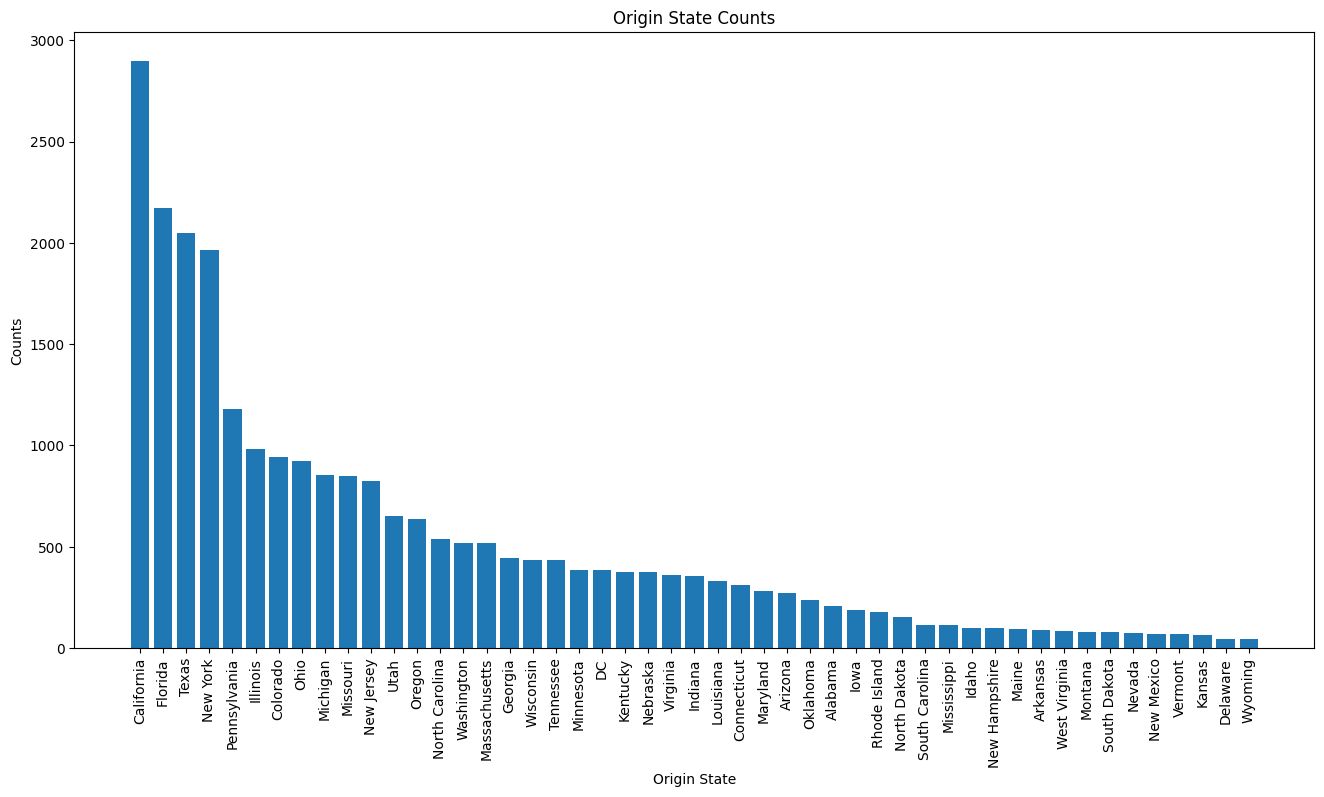

In [42]:
#collisions per state
plot_counts(my_df, 'Origin State', (16, 8))

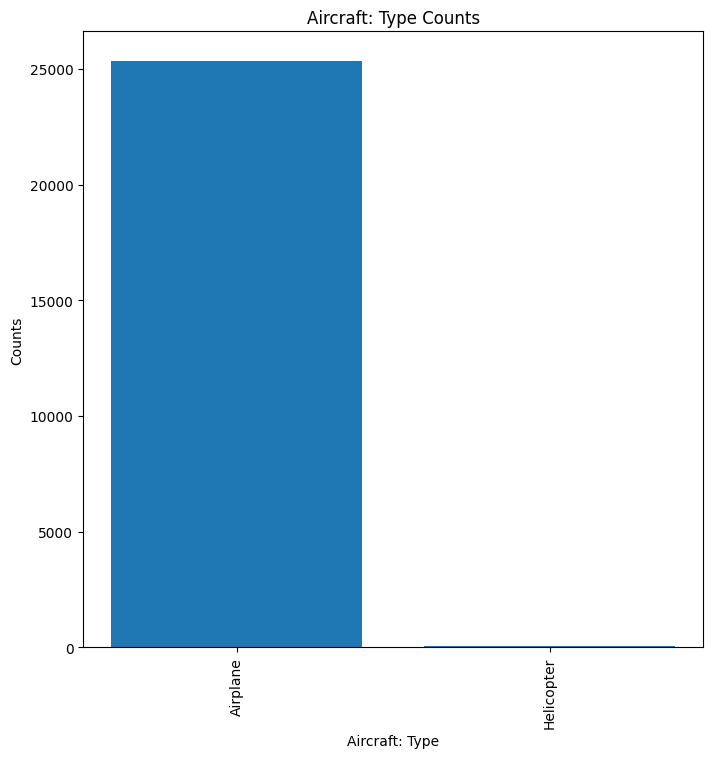

In [44]:
#Collisions per aircraft type
plot_counts(my_df, 'Aircraft: Type', (8, 8))

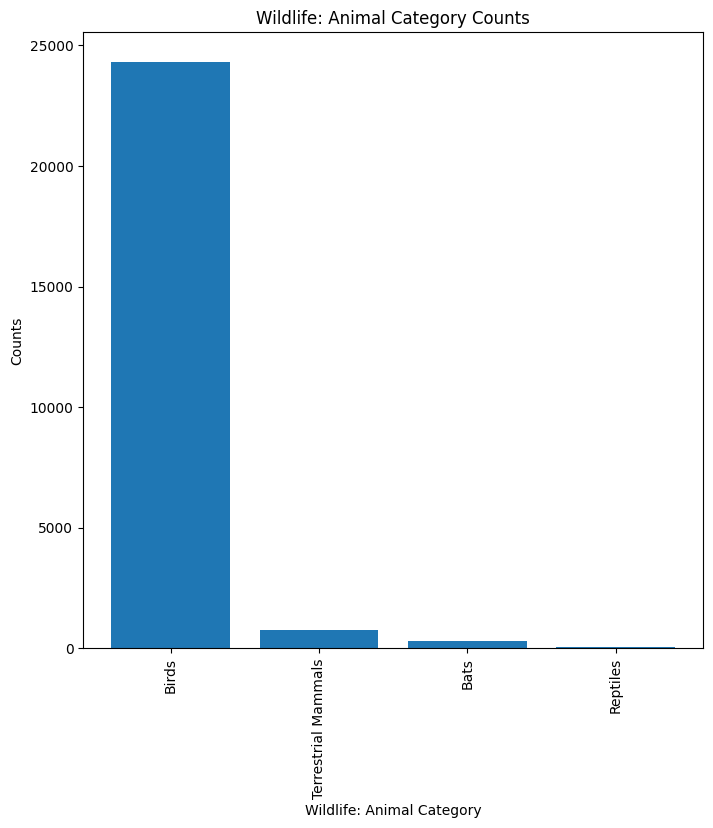

In [46]:
#collisions per animal category
plot_counts(my_df, 'Wildlife: Animal Category', (8, 8))

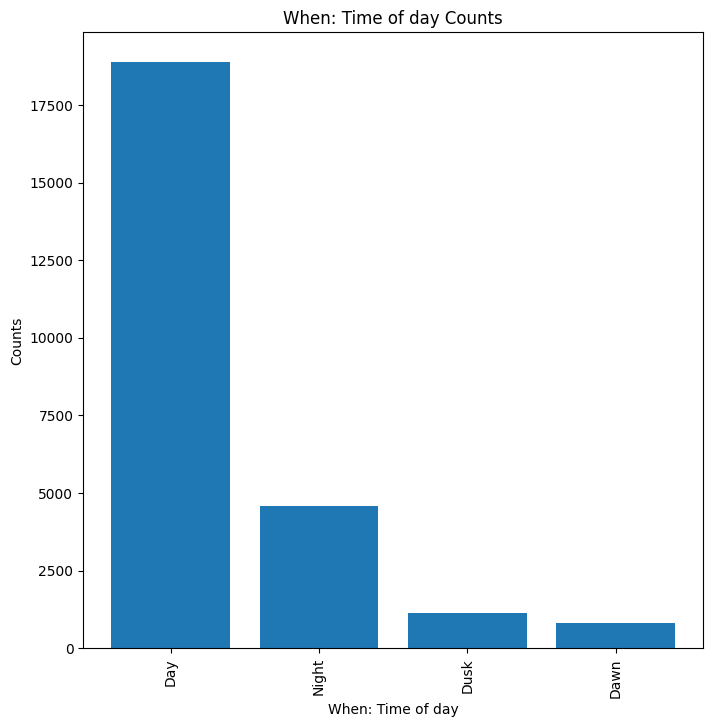

In [48]:
#collisions - Time of day
plot_counts(my_df, 'When: Time of day', (8,8))

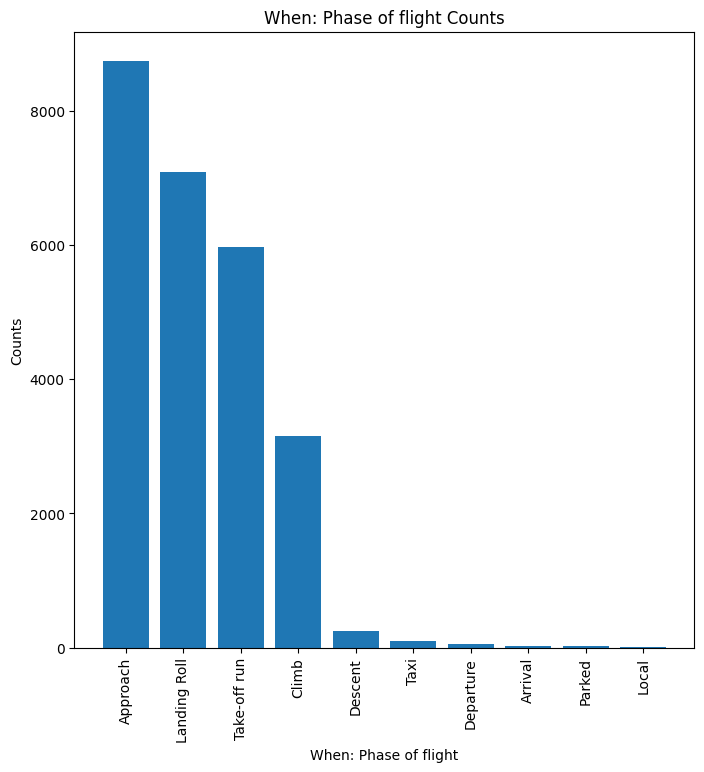

In [51]:
#collisions - Phase of flight
plot_counts(my_df, 'When: Phase of flight', (8, 8))

In [6]:
#convert collision to datetiem
my_df['Collision Date and Time'] = pd.to_datetime(my_df['Collision Date and Time'])

#make columns for year and month
my_df['Year'] = my_df['Collision Date and Time'].dt.year
my_df['Month'] = my_df['Collision Date and Time'].dt.month_name()

#check
my_df.head()

/tmp/ipykernel_203295/3154276598.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  my_df['Collision Date and Time'] = pd.to_datetime(my_df['Collision Date and Time'])


,Airport: Code,Origin State,Aircraft: Type,Aircraft: Number of engines,Collision Date and Time,When: Time of day,When: Phase of flight,Effect: Indicated Damage,Cost: Total $,Wildlife: Animal Category,Year,Month
2,KABE,Pennsylvania,Airplane,2.0,2009-04-23 09:22:00,Day,Take-off run,Caused damage,"171,132",Birds,2009,April
3,KABE,Pennsylvania,Airplane,2.0,2014-04-13 22:00:00,Night,Approach,No damage,600,Birds,2014,April
4,KABE,Pennsylvania,Airplane,2.0,2009-03-31 18:15:00,Day,Approach,Caused damage,"188,245",Birds,2009,March
5,KABE,Pennsylvania,Airplane,2.0,2002-03-19 09:09:00,Day,Take-off run,No damage,0,Birds,2002,March
6,KABE,Pennsylvania,Airplane,3.0,2014-04-10 18:15:00,Day,Take-off run,No damage,0,Birds,2014,April


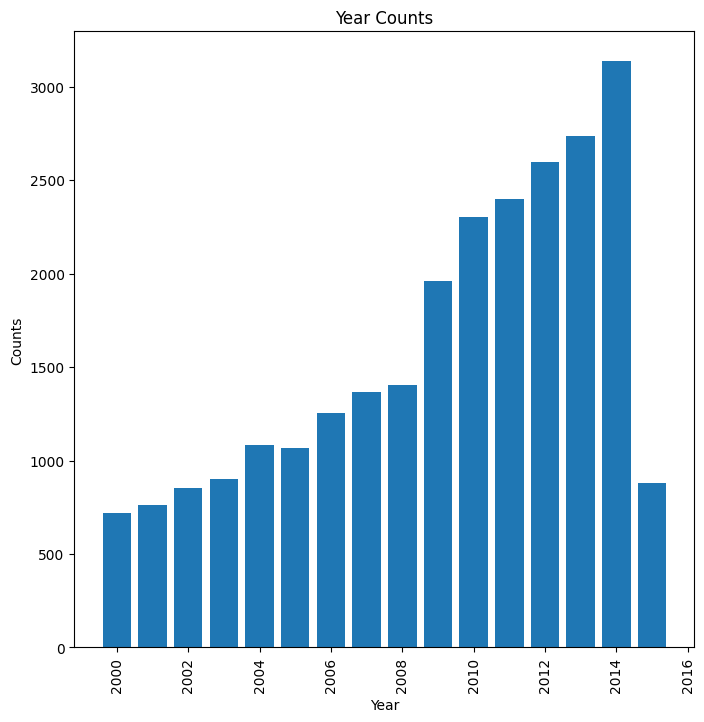

In [55]:
#Collisions per year
plot_counts(my_df, 'Year', (8, 8))


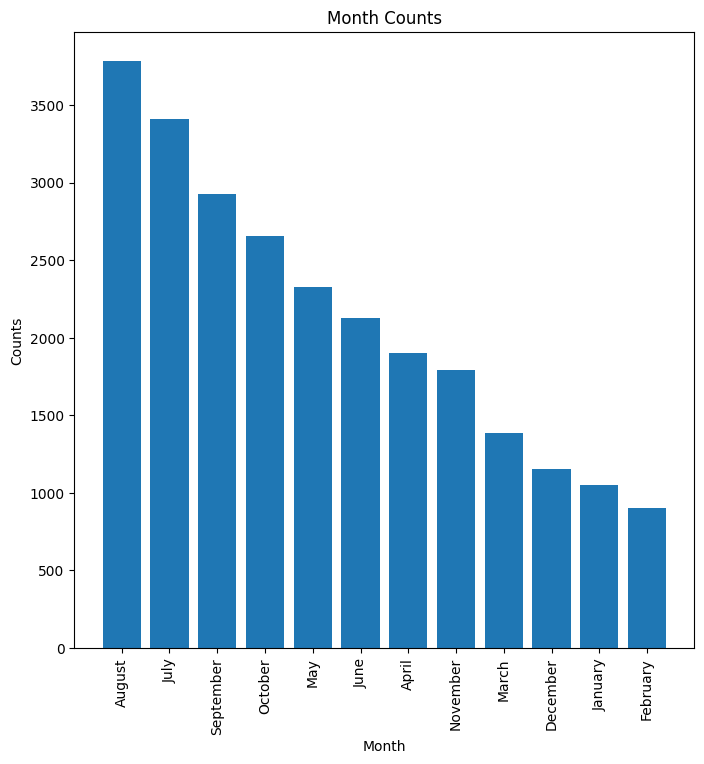

In [57]:
# Collisions per Month
plot_counts(my_df, 'Month', (8, 8))

In [25]:
#collisions per month per year
month_year = pd.DataFrame(my_df.groupby(['Month', 'Year'])['Year'].count())
month_year.rename(columns={'Year': 'Count'}, inplace=True)
month_year.reset_index(inplace=True)

In [36]:
month_year.dtypes

Month    object
Year      int32
Count     int64
dtype: object

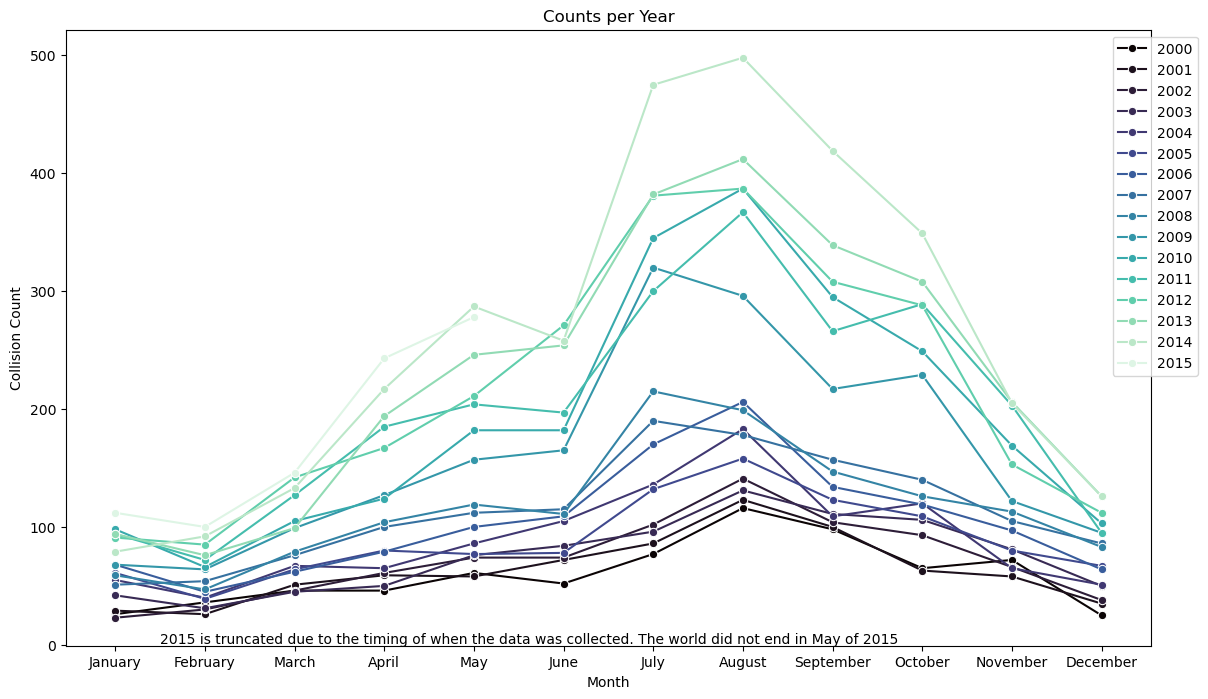

In [44]:
#sort by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_year['Month'] = pd.Categorical(month_year['Month'], categories=month_order, ordered=True)
sorted_month_year = month_year.sort_values(by='Month')


#plot month_year data
fig = plt.figure(figsize=(14, 8))
sns.lineplot(data=sorted_month_year, x='Month', y='Count', hue=sorted_month_year['Year'], palette='mako', legend='full', marker='o', sort=False)
plt.title('Counts per Year')
plt.xlabel('Month')
plt.ylabel('Collision Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.annotate("2015 is truncated due to the timing of when the data was collected. The world did not end in May of 2015", xy=(0.5, 0.9))
plt.show()


The number of collisions appears to consistently increase from May, peak in July/August then steadily decrease. We know Birds account for the majority of strikes thus this pattern does make sense given the migratory nature of birds.

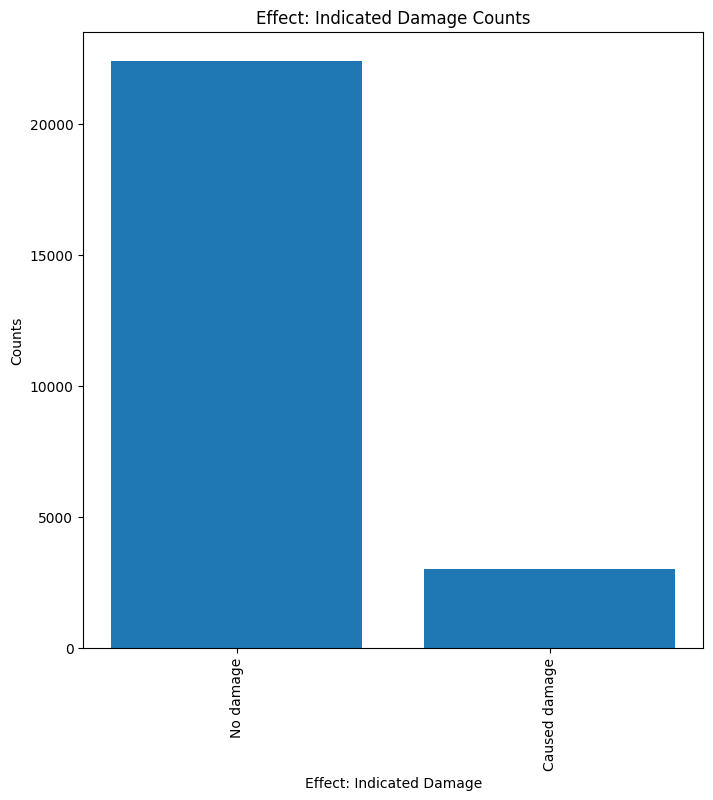

In [58]:
#damage causing collisions
plot_counts(my_df, 'Effect: Indicated Damage', (8, 8))

In [8]:
my_df.dtypes

Airport: Code                          object
Origin State                           object
Aircraft: Type                         object
Aircraft: Number of engines           float64
Collision Date and Time        datetime64[ns]
When: Time of day                      object
When: Phase of flight                  object
Effect: Indicated Damage               object
Cost: Total $                          object
Wildlife: Animal Category              object
Year                                    int32
Month                                  object
dtype: object

In [7]:
#need to factorize and do some other analysis with the categorical data and the target
factorized_df = my_df.copy() # make df copy

factorized_df = factorized_df.drop('Collision Date and Time', axis=1) #drop because data extracted
factorized_df['Cost: Total $'] = factorized_df['Cost: Total $'].str.replace(",", "") # remove comma to facilitate data change
factorized_df['Cost: Total $'] = factorized_df['Cost: Total $'].astype(int) #change to int dtype
factorized_df['Aircraft: Number of engines'] = factorized_df['Aircraft: Number of engines'].astype(str) #change to str

#for future - if no inherent order in categorical data use dummies or one hot encoding, else use factorize
#get dummies for all
dummy_col = list(factorized_df.columns)
dummy_df = pd.get_dummies(factorized_df[dummy_col], dtype=int)
dummy_df


,Cost: Total $,Year,Airport: Code_KABE,Airport: Code_KABI,Airport: Code_KABQ,Airport: Code_KABR,Airport: Code_KABY,Airport: Code_KACK,Airport: Code_KACT,Airport: Code_KACV,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
2,171132,2009,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600,2014,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,188245,2009,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,2002,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,2014,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28281,0,2015,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
28282,0,2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28283,0,2000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
28285,0,2013,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#need to do ANOVA too

In [9]:
#heatmap - with threshold
threshold = 0.3
correlation = dummy_df.corr()

# Get the column names with correlations above the threshold - errors here
high_corr_columns = correlation.columns[correlation.abs() > threshold]
high_corr_columns
# Select the relevant columns from the original DataFrame
#high_corr_features = dummy_df[high_corr_columns]

#sns.heatmap(high_corr_features, cmap='coolwarm', annot=True)
#plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

# Modelling

In [49]:
#import libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [46]:
my_df

,Airport: Code,Origin State,Aircraft: Type,Aircraft: Number of engines,Collision Date and Time,When: Time of day,When: Phase of flight,Effect: Indicated Damage,Cost: Total $,Wildlife: Animal Category,Year,Month
2,KABE,Pennsylvania,Airplane,2.0,2009-04-23 09:22:00,Day,Take-off run,Caused damage,"171,132",Birds,2009,April
3,KABE,Pennsylvania,Airplane,2.0,2014-04-13 22:00:00,Night,Approach,No damage,600,Birds,2014,April
4,KABE,Pennsylvania,Airplane,2.0,2009-03-31 18:15:00,Day,Approach,Caused damage,"188,245",Birds,2009,March
5,KABE,Pennsylvania,Airplane,2.0,2002-03-19 09:09:00,Day,Take-off run,No damage,0,Birds,2002,March
6,KABE,Pennsylvania,Airplane,3.0,2014-04-10 18:15:00,Day,Take-off run,No damage,0,Birds,2014,April
...,...,...,...,...,...,...,...,...,...,...,...,...
28281,KYNG,Ohio,Airplane,2.0,2015-02-13 14:00:00,Day,Climb,Caused damage,0,Birds,2015,February
28282,KYNG,Ohio,Airplane,2.0,2014-09-28 18:55:00,Dusk,Landing Roll,No damage,0,Birds,2014,September
28283,KYNG,Ohio,Airplane,2.0,2000-12-28 22:50:00,Night,Take-off run,No damage,0,Birds,2000,December
28285,KYNG,Ohio,Airplane,2.0,2013-09-22 21:30:00,Night,Approach,No damage,0,Birds,2013,September


In [56]:
#convert cost: total $ to int
my_df['Cost: Total $'] = my_df['Cost: Total $'].str.replace(",", "")
my_df['Cost: Total $'] = my_df['Cost: Total $'].astype(int)
my_df.dtypes

Airport: Code                          object
Origin State                           object
Aircraft: Type                         object
Aircraft: Number of engines           float64
Collision Date and Time        datetime64[ns]
When: Time of day                      object
When: Phase of flight                  object
Effect: Indicated Damage               object
Cost: Total $                           int64
Wildlife: Animal Category              object
Year                                    int32
Month                                  object
dtype: object

In [57]:
#function to split data
def split_data(X_var, y_var):
    X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size=0.3, shuffle=True)
    return X_train, X_test, y_train, y_test


#function to declare target and inputs
def declare_var(dataframe, inputs, target):
    X = dataframe[inputs]
    y = dataframe[target]
    return X, y


In [58]:
#declare inputs and target
my_inputs = ['Aircraft: Type', 'Aircraft: Number of engines', 'When: Time of day', 'When: Phase of flight', 'Effect: Indicated Damage', 'Wildlife: Animal Category', 'Month']
X, y = declare_var(my_df, my_inputs, 'Cost: Total $')

#split data
X_train, X_test, y_train, y_test = split_data(X, y)


In [59]:
#initialize pipeline
pipeline=Pipeline(steps=[
    ('onehot', OneHotEncoder()),
    ('model', LinearRegression())
])

In [60]:
#cross val scores
my_scores = cross_val_score(pipeline, X_train, y_train)

my_scores

array([ 0.00737601,  0.01419675,  0.02623734,  0.0071943 , -0.0087234 ])